In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


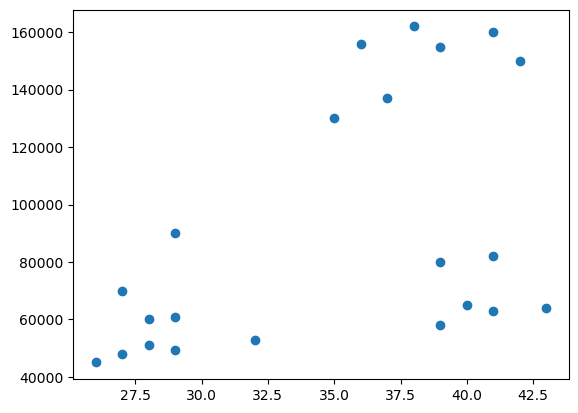

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


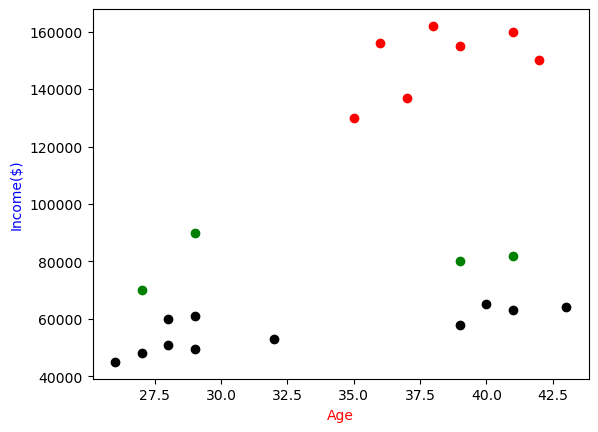

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

plt.xlabel('Age',color='red')
plt.ylabel('Income($)',color='blue')
plt.show()

In [9]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)','Age']])
df[['Income($)','Age']]=scaler.transform(df[['Income($)','Age']])

In [10]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gutam,0.764706,0.940171,1
6,Dvid,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [11]:
km=KMeans(n_clusters=3)

In [12]:
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster']=y_predict

In [14]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gutam,0.764706,0.940171,0
6,Dvid,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


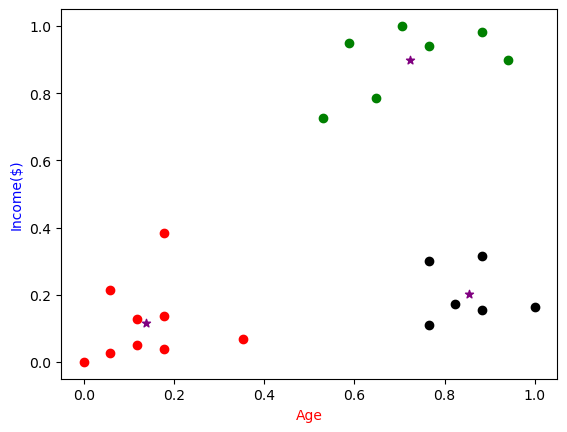

In [15]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age',color='red')
plt.ylabel('Income($)',color='blue')
plt.show()

In [16]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [26]:
k_rng=range(1,10)
SSE=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    SSE.append(km.inertia_)

C:\Users\schan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
SSE

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009398,
 0.17840674931327932,
 0.14247582522543334,
 0.10497488680620909]

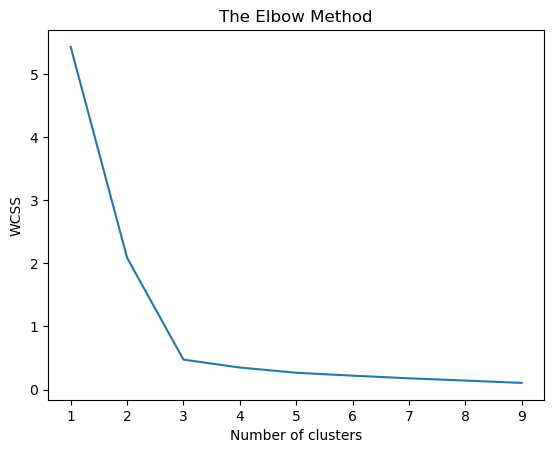

In [29]:
plt.plot(k_rng,SSE)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()